In [1]:
from __future__ import print_function
import cProfile
import pandas as pd
import tables as tb
import numpy as np
from Util import *
import time
import mplFunctions as mpl
import wfmFunctions as wfm
import sensorFunctions as snf
import tblFunctions as tbl
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8) # Bigger plots
%matplotlib inline
%load_ext autoreload
%autoreload 2
print("This notebook has been run last on {} at {}.".format(time.strftime("%d/%m/%Y"),time.strftime("%H:%M:%S")))

/Applications/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


This notebook has been run last on 20/10/2016 at 00:38:32.


In [16]:
try:
    h5f.close()
except:
    pass

In [17]:
#run /Users/Gonzalo/github/IC/Cities/ANASTASIA.py -c /Users/Gonzalo/github/IC/Config/ANASTASIA_default.csv

In [18]:
h5f = tb.open_file('/Users/Gonzalo/github/IC/data/ISIDORA1000.h5')
print(h5f)

/Users/Gonzalo/github/IC/data/ISIDORA1000.h5 (File) ''
Last modif.: 'Thu Oct 20 00:48:48 2016'
Object Tree: 
/ (RootGroup) ''
/BLR (Group) ''
/BLR/mau (EArray(1000, 32000), shuffle, zlib(1)) ''
/BLR/pulse_on (EArray(1000, 32000), shuffle, zlib(1)) ''
/BLR/wait_over (EArray(1000, 32000), shuffle, zlib(1)) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
/MC/MCTracks (Table(81960,), zlib(1)) ''
/RD (Group) ''
/RD/pmtblr (EArray(1000, 12, 32000), shuffle, zlib(1)) ''
/RD/pmtcwf (EArray(1000, 12, 32000), shuffle, zlib(1)) ''
/RD/pmtrwf (EArray(1000, 12, 32000), shuffle, zlib(1)) ''
/RD/sipmrwf (EArray(1000, 1789, 800), shuffle, zlib(1)) ''
/Sensors (Group) ''
/Sensors/DataPMT (Table(12,)) ''
/Sensors/DataSiPM (Table(1789,)) ''
/TWF (Group) ''
/TWF/PMT (Table(13980,), shuffle, zlib(1)) 'Store for PMTs TWF'
/TWF/SiPM (Table(104828,), shuffle, zlib(1)) 'Store for SiPMs TWF'
/ZS (Group) ''
/ZS/PMT (EArray(1000, 1, 32000), 

In [19]:
pmttwf   = h5f.root.TWF.PMT
sipmtwf  = h5f.root.TWF.SiPM
pmtblr   = h5f.root.RD.pmtblr
pmtcwf   = h5f.root.RD.pmtcwf
pmtrwf   = h5f.root.RD.pmtrwf
sipmrwf  = h5f.root.RD.sipmrwf
pmtzswf  = h5f.root.ZS.PMT
pmtzsblr = h5f.root.ZS.PMTBLR
sipmzswf = h5f.root.ZS.SiPM
pmtdf    = snf.read_data_sensors(h5f.root.Sensors.DataPMT)
sipmdf   = snf.read_data_sensors(h5f.root.Sensors.DataSiPM)

In [6]:
pmt12 = pmtcwf[0].sum(axis=0)

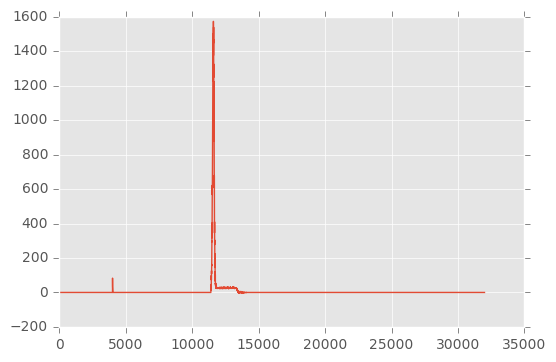

In [7]:
plt.plot(pmt12)

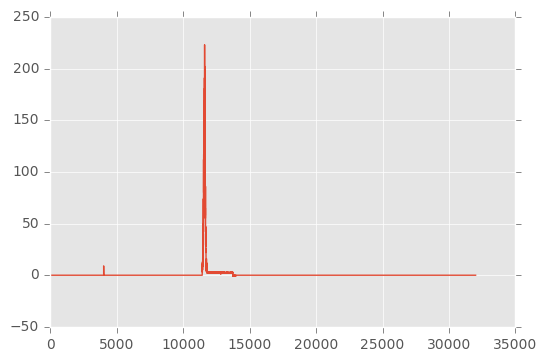

In [8]:
plt.plot(pmtcwf[0,0])
#plt.ylim((-1,5))

In [9]:
pmtzswf[0]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 

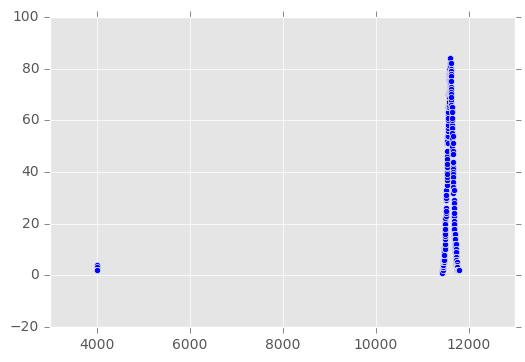

In [10]:
a = pmtzswf[0,0]
t = np.argwhere(a!=0)
e = a[t]
plt.scatter(t,e)
#plt.xlim((399,400))
#plt.ylim((-1,5))

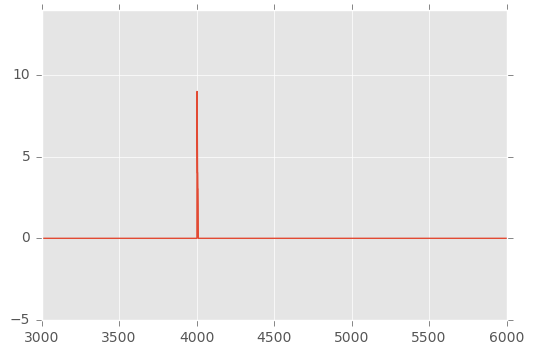

In [11]:
#S1!!
mpl.plts(pmtcwf[0,0],signal_start=3000,signal_end=6000,offset=5)

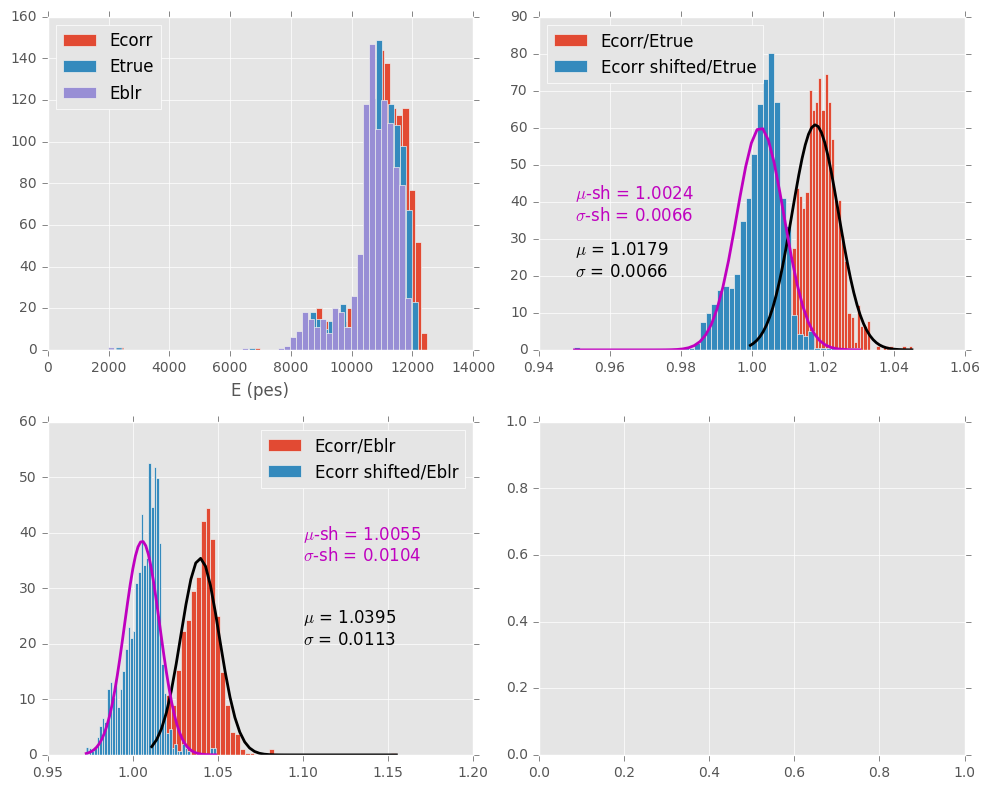

In [23]:
from scipy.stats import norm
import matplotlib.mlab as mlab

nevts = pmtzswf.shape[0]
nbins = 50
Etrue = np.empty(nevts)
Ecorr = np.empty(nevts)
Eblr  = np.empty(nevts)

for i in range(nevts):
    Ecorr[i] = np.sum(pmtzswf[i,0])
    Etrue[i] = tbl.read_wf_table(pmttwf,i).sum().sum(axis=1).ene_pes
    Eblr [i] = pmtzsblr[i,0].sum()

c0t,c1t = np.polyfit(Etrue,Ecorr,1)
c0b,c1b = np.polyfit(Eblr ,Ecorr,1)

EratioTrue  = Ecorr/Etrue
EratioTrueS = (Ecorr-c1t)/Etrue
EratioBLR   = Ecorr/Eblr
EratioBLRS  = (Ecorr-c1b)/Eblr

fig, axes = plt.subplots(2,2)
fig.set_size_inches(10,8)
hcorr  = axes[0,0].hist(Ecorr,nbins,label='Ecorr')
htrue  = axes[0,0].hist(Etrue,nbins,label='Etrue')
hblr   = axes[0,0].hist(Eblr ,nbins,label='Eblr' )

hratioTrue  = axes[0,1].hist(EratioTrue,nbins,normed=True,label='Ecorr/Etrue')
hratioTrueS = axes[0,1].hist(EratioTrueS,nbins,normed=True,label='Ecorr shifted/Etrue')
hratioBLR   = axes[1,0].hist(EratioBLR,nbins,normed=True,label='Ecorr/Eblr')
hratioBLRS  = axes[1,0].hist(EratioBLRS,nbins,normed=True,label='Ecorr shifted/Eblr')

axes[0,0].legend(loc = 'upper left')
axes[0,1].legend(loc = 'upper left')
axes[1,0].legend()

axes[0,0].set_xlabel('E (pes)')

binsTrue = hratioTrue[1]
muTrue,sigmaTrue = norm.fit(EratioTrue)
fitTrue = mlab.normpdf(binsTrue, muTrue, sigmaTrue)

binsTrueS = hratioTrueS[1]
muTrueS,sigmaTrueS = norm.fit(EratioTrueS)
fitTrueS = mlab.normpdf(binsTrueS, muTrueS, sigmaTrueS)

binsBLR = hratioBLR[1]
muBLR,sigmaBLR = norm.fit(EratioBLR)
fitBLR = mlab.normpdf(binsBLR, muBLR, sigmaBLR)

binsBLRS = hratioBLRS[1]
muBLRS,sigmaBLRS = norm.fit(EratioBLRS)
fitBLRS = mlab.normpdf(binsBLRS, muBLRS, sigmaBLRS)

axes[0,1].text(0.95,20,'$\mu$ = {:.4f}\n$\sigma$ = {:.4f}'.format(muTrue,sigmaTrue),fontsize=12,color='k')
axes[0,1].text(0.95,35,'$\mu$-sh = {:.4f}\n$\sigma$-sh = {:.4f}'.format(muTrueS,sigmaTrueS),fontsize=12,color='m')

axes[1,0].text(1.1,20,'$\mu$ = {:.4f}\n$\sigma$ = {:.4f}'.format(muBLR,sigmaBLR),fontsize=12,color='k')
axes[1,0].text(1.1,35,'$\mu$-sh = {:.4f}\n$\sigma$-sh = {:.4f}'.format(muBLRS,sigmaBLRS),fontsize=12,color='m')

ratioTrue  = axes[0,1].plot(binsTrue, fitTrue, 'k-', linewidth=2)
ratioTrueS = axes[0,1].plot(binsTrueS, fitTrueS, 'm-', linewidth=2)

ratioBLR  = axes[1,0].plot(binsBLR, fitBLR, 'k-', linewidth=2)
ratioBLRS = axes[1,0].plot(binsBLRS, fitBLRS, 'm-', linewidth=2)

plt.tight_layout()


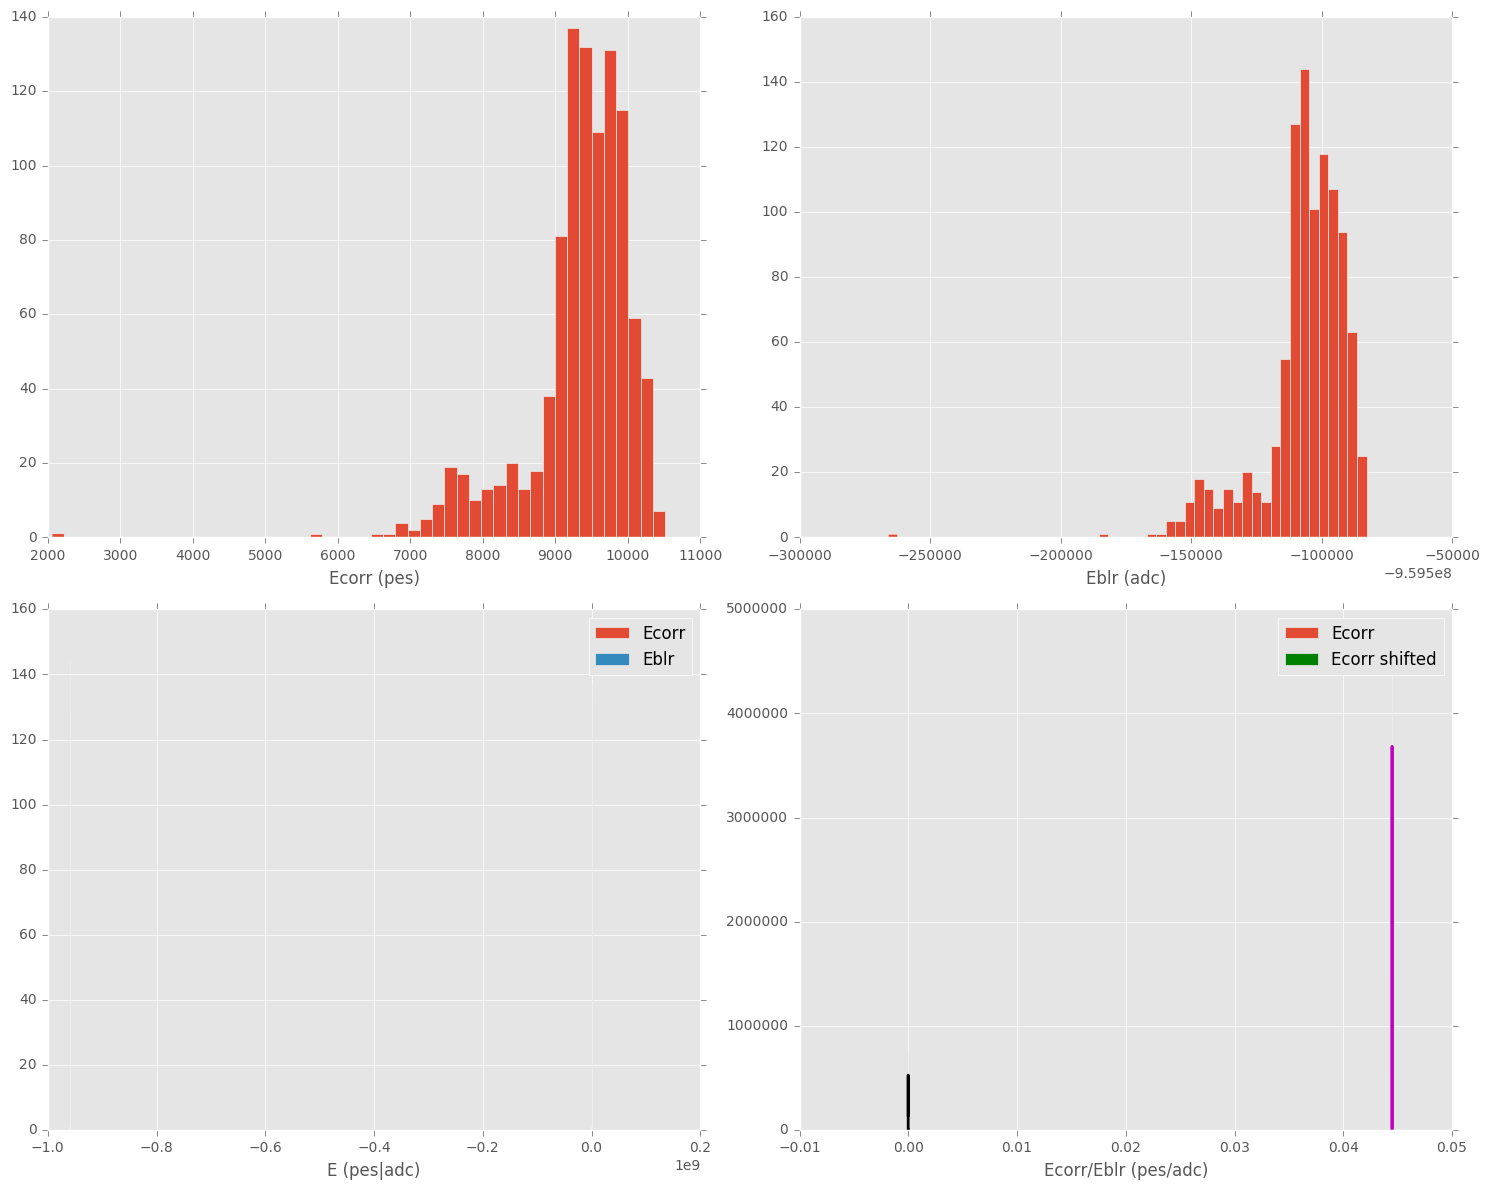

In [280]:
from scipy.stats import norm
import matplotlib.mlab as mlab

nevts = pmtrwf.shape[0]
nbins = 50
Etrue = np.empty(nevts)
Ecorr = np.empty(nevts)

for i in range(nevts):
    Ecorr[i] = np.sum(tbl.read_wf(pmtzswf,i,12)[1])
    Etrue[i] = -pmtblr[i].sum()

c0,c1 = np.polyfit(Etrue,Ecorr,1)

Eratio = Ecorr/Etrue
EratioCorr = (Ecorr-c1)/Etrue

fig, axes = plt.subplots(2,2)
fig.set_size_inches(15,12)
hcorr  = axes[0,0].hist(Ecorr,nbins)
htrue  = axes[0,1].hist(Etrue,nbins)
hcorr  = axes[1,0].hist(Ecorr,nbins,label='Ecorr')
htrue  = axes[1,0].hist(Etrue,nbins,label='Eblr')
axes[1,0].legend()
hratio = axes[1,1].hist(Eratio,nbins,normed=True,label='Ecorr')
hratioCorr = axes[1,1].hist(EratioCorr,nbins,normed=True,label='Ecorr shifted',color='g')
axes[1,1].legend()

axes[0,0].set_xlabel('Ecorr (pes)')
axes[0,1].set_xlabel('Eblr (adc)')
axes[1,0].set_xlabel('E (pes|adc)')
axes[1,1].set_xlabel('Ecorr/Eblr (pes/adc)')


bins = hratio[1]
mu,sigma = norm.fit(Eratio)
y = mlab.normpdf( bins, mu, sigma)

binsC = hratioCorr[1]
muC,sigmaC = norm.fit(EratioCorr)
yC = mlab.normpdf( binsC, muC, sigmaC)

#axes[1,1].text(.88,30,'$\mu$ = {:.4f}\n$\sigma$ = {:.4f}'.format(mu,sigma),fontsize=15,color='k')
#axes[1,1].text(.88,40,'$\mu$-sh = {:.4f}\n$\sigma$-sh = {:.4f}'.format(muC,sigmaC),fontsize=15,color='m')

ratiof = axes[1,1].plot(bins, y, 'k-', linewidth=2)
ratiofC = axes[1,1].plot(binsC, yC, 'm-', linewidth=2)

plt.tight_layout()


(array([ 3.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  3.,
         2.,  1.,  4.,  8.,  7.,  6.,  7.,  4.,  4.,  1.,  7.,  3.,  6.,
         6.,  1.,  3.,  7.,  3.,  1.,  2.,  1.,  0.,  0.,  1.]),
 array([  8477.  ,   8555.02,   8633.04,   8711.06,   8789.08,   8867.1 ,
          8945.12,   9023.14,   9101.16,   9179.18,   9257.2 ,   9335.22,
          9413.24,   9491.26,   9569.28,   9647.3 ,   9725.32,   9803.34,
          9881.36,   9959.38,  10037.4 ,  10115.42,  10193.44,  10271.46,
         10349.48,  10427.5 ,  10505.52,  10583.54,  10661.56,  10739.58,
         10817.6 ,  10895.62,  10973.64,  11051.66,  11129.68,  11207.7 ,
         11285.72,  11363.74,  11441.76,  11519.78,  11597.8 ,  11675.82,
         11753.84,  11831.86,  11909.88,  11987.9 ,  12065.92,  12143.94,
         12221.96,  12299.98,  12378.  ]),
 <a list of 50 Patch objects>)

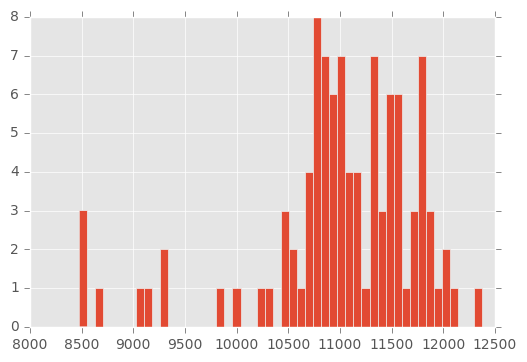

In [166]:
E = []
for i in range(100):
    E.append( tbl.read_wf_table(pmttwf,i).sum().sum(axis=1).ene_pes )

plt.hist(np.array(E),)

ZS BLR ANASTASIA
MISMO FICHERO
CONSTANTE CALIBRACION IDENTICA
WF CON NOISE SUPPRESSION
ROUNDING ERROR

teño que:
1.- Comprobar carga pulsos
2.- PMT gordo
3.- Salvar nun ficheiro distinto
   3.1.- PMT gordo ZS (que define ventana)
   3.2.- SiPMs ZS en ventana PMT gordo
   